# Comparison between unfilter and filtered data

## Hardware
All data has been collected using three Adafruit technology boards. 
The main board is the Adafruit nRF52840 Express, the accelerometer is the LSM303DLHC and all data is being written to a 5v ready Micro-Sd card break out board. 
links to the hardware details below:
https://www.adafruit.com/product/4062 Feather
https://www.adafruit.com/product/1120 Accelerometer 
https://www.adafruit.com/product/254 Micro-Sd breakout board
#### Note:
The accelerometer is being swaped out for the Adafruit LSM9DS1.
https://www.adafruit.com/product/3387

## Purpose
This journal will be a break down of the python code I used to read in data collected by the accelerometer and comparing the before after it is passed through a third order low pass butterworth filter. 

### Imports 
There are four main imports for this program. The first is matplotlib.pyplot, matplotlib.pyplot is used to vizulize the data before and after it has been passed through the lowpass filter. The second import numpy is used to convert python list into array to ease calculation and to increase perfromance since numpy arrays are more efficient when compared to a python list. The third import is csv and is used when reading in the csv file and splitting the data into there perspective list. Finally scipy, scipy is used to create the butterworth filter and then filter the data to eliminate noisy data and produce a clean signal. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy import signal

### The Read In
The next function is responsible for reading in data from the csv file. The data is then distrubuted into three list for each of the three axis.

In [2]:
def read_file(file_name):
    """
    Takes the data file splits it into rows
    the elements are then put into list that correspond
    to the data i.e the z is saved under the ax or the acceleration x value
    :param file_name: The list of data that will be read in.
    :return: A tuple with the list of x values, y values and z values.
    """
    ax = []
    ay = []
    az = []

    with open(file_name) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0

        for row in csv_reader:

            if line_count == 0:
                print("az, ax ay")
                az.append(int(row[0]))
                ax.append(int(row[1]))
                ay.append(int(row[2]))
                line_count += 1
            else:
                az.append(int(row[0]))
                ax.append(int(row[1]))
                ay.append(int(row[2]))
                line_count += 1

    return ax, ay, az

### The low pass 
The low-pass filter that is utilized by this program is a 3rd order low pass butterworth filter. To read more about the functions used by scypi visit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
The function then proccedes to call the plot function from pyplot to allow us to visualize the data. 

In [20]:
def make_list(n):
    """
    Makes a list of size 1000
    :return: A list of size 1000
    """
    lst = []
    for i in range(n):
        lst.append(i+1)
    return lst

def low_filter(data):
    accel_y_values = data[0]
    accel_z_values = data[1]
    accel_x_values = data[2]
    lst = make_list(len(accel_x_values))
    
    np_x_values = np.array(accel_x_values)
    np_y_values = np.array(accel_y_values)
    np_z_values = np.array(accel_z_values)
    np_list = np.array(lst)

    b, a = signal.butter(3, 0.05)

    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, np_z_values, zi=zi * np_z_values[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi * z[0])
    lp_z = signal.filtfilt(b, a, np_z_values)

    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, np_x_values, zi=zi * np_x_values[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi * z[0])
    lp_x = signal.filtfilt(b, a, np_x_values)

    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, np_y_values, zi=zi * np_y_values[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi * z[0])
    lp_y = signal.filtfilt(b, a, np_y_values)

    plt.plot(np_list, np_z_values, c='green')
    plt.plot(np_list, lp_z, c='cyan')

    plt.plot(np_list, np_x_values, c='red')
    plt.plot(np_list, lp_x, c='black')

    plt.plot(np_list, np_y_values, alpha=.3, c='blue')
    plt.plot(np_list, lp_y, alpha=.3, c='orange')

    plt.xlabel("Line")
    plt.xticks()
    plt.ylabel("Raw Data")
    plt.title("raw data vs low pass data ")
    
    
    plt.show()
    
    the_file = open("Data/all_axis_movement_low_pass.txt", "w+")
    
    print("The data after low pass: ")
    
    for i in range(len(lp_y)):
        out = str(lp_x[i]) +', ' + str(lp_y[i]) +', ' + str(lp_z[i]) + '\n'
        the_file.write(out)
    
    the_file.close()

### Experiment one
In this experiment the hardware was not moved until a 1,000 lines of data was written to the sd card. Below is the raw data before and after filtration.

az, ax ay


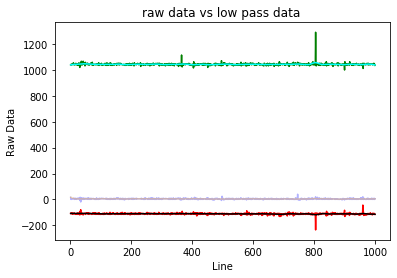

The data after low pass: 


In [14]:
file_name = "Data/No_movement.csv"
data = read_file(file_name)
low_filter(data)

### Experiment two
In experiment two, 1000 lines of data was collected while the accelerometer is moved along the x-axis.


az, ax ay


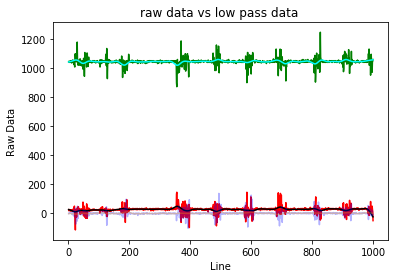

The data after low pass: 


In [16]:
file_name = "Data/x_movement.csv"
data = read_file(file_name)
low_filter(data)

## Experiment Three
In experiment three, 1000 lines of data was collected while the accelerometer is moved along the y-axis.

az, ax ay


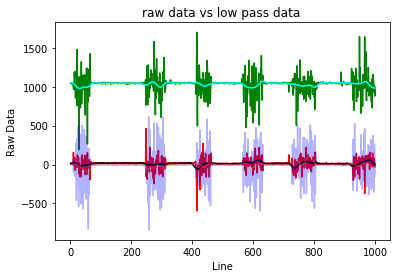

The data after low pass: 


In [19]:
file_name = "Data/y_movement.csv"
data = read_file(file_name)
low_filter(data)

## Movement in all directions 
For the final experiment, 1000 lines of data was collected while the accelerometer is moved in all directions.

az, ax ay


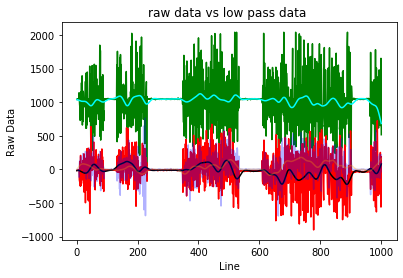

The data after low pass: 


In [22]:
file_name = "Data/allAxis_movement.csv"
data = read_file(file_name)
low_filter(data)